In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

In [5]:
df = pd.read_csv('E:\\Datasets\\Social_Network_Ads.csv')

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
x = df.drop(columns = ['Purchased','Gender','User ID'])

y = df['Purchased']
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

x_train.shape,x_test.shape

((320, 2), (80, 2))

## Standard Scaler

In [24]:
sc = StandardScaler()

sc.fit(x_train)

x_train_scaled = sc.transform(x_train)

x_test_scaled = sc.transform((x_test))



In [26]:
x_train.head()

,Age,EstimatedSalary
205,47,47000
354,36,99000
3,27,57000
264,48,90000
194,28,89000


In [92]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)

x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [43]:
x_train_scaled.head()

,Age,EstimatedSalary
0,0.889288,-0.659246
1,-0.172548,0.873927
2,-1.041324,-0.364405
3,0.985819,0.608570
4,-0.944793,0.579086


In [45]:
round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


## EFFECT OF SCALING

C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


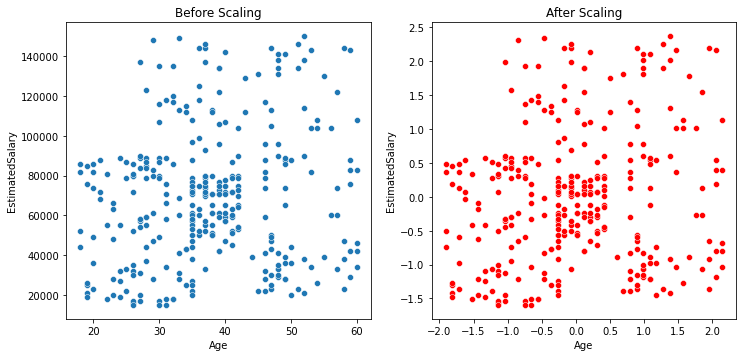

In [48]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Before Scaling')
sns.scatterplot(x_train['Age'],x_train['EstimatedSalary'])

plt.subplot(2,2,2)

plt.title('After Scaling')

sns.scatterplot(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')

plt.show()

C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<AxesSubplot:title={'center':'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

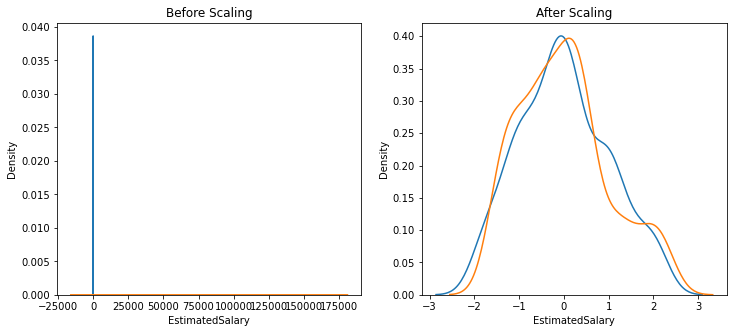

In [67]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')

sns.distplot(x_train['Age'],ax=ax1,hist=False)
sns.distplot(df['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')

sns.distplot(x_train_scaled['Age'],ax=ax2,hist=False)

sns.distplot(x_train_scaled['EstimatedSalary'],ax=ax2,hist=False)

C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'After Scaling'}, xlabel='Age', ylabel='Density'>

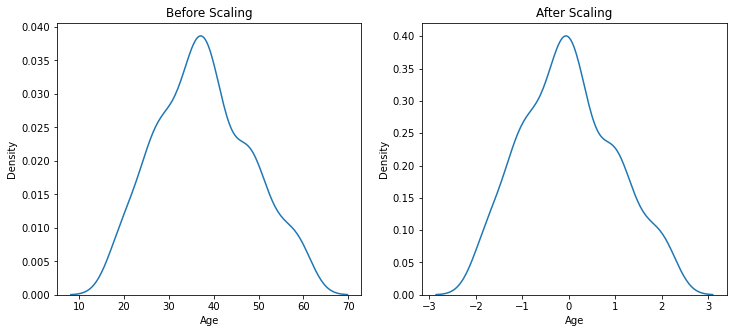

In [75]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,5))

ax1.set_title('Before Scaling')

sns.distplot(x_train['Age'],ax=ax1,hist = False)

ax2.set_title('After Scaling')

sns.kdeplot(x_train_scaled['Age'],ax=ax2)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

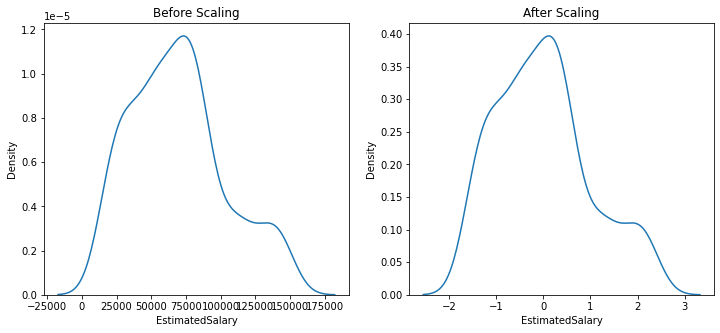

In [80]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')

sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')

sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

In [88]:
lr = LogisticRegression()

lr_scaled = LogisticRegression()



In [90]:
lr.fit(x_train,y_train)

lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [95]:
y_pred = lr.predict(x_test)

y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [96]:
print(accuracy_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred_scaled))

0.6
0.8125


## Scaling is not important for Decision Tree

In [102]:
# I can prove it

dt = DecisionTreeClassifier()

dt_scaled = DecisionTreeClassifier()

In [104]:
dt.fit(x_train,y_train)

dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [106]:
y_pred = dt.predict(x_test)

y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [107]:
print(accuracy_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred_scaled))

0.8625
0.85
